## Classificação de roupas com Redes Convolucionais 

#### Com o uso das redes convolucionais, podemos analisar a coloração de cada um dos pixels que compoem a imagem e assim classificar as roupas de acordo com as seguintes classes:
* 0 - T-shirt/top
* 1 - Trouser
* 2 - Pullover
* 3 - Dress
* 4 - Coat
* 5 - Sandal
* 6 - Shirt
* 7 - Sneaker
* 8 - Bag
* 9 - Ankle boot


## 1 - Importação das bibliotecas

In [2]:
import pandas as pd
import numpy as np 
import seaborn as sb
import tensorflow as tf
import matplotlib.pyplot as plt 
import random
tf.__version__

'2.2.0'

## 2 - Carregamento dos dados via .csv

In [5]:
datasetTreino = pd.read_csv("treino.csv")
datasetTeste = pd.read_csv("teste.csv")

## 3-  Visualização dos dados 

#### Head datasetTreino

In [6]:
datasetTreino.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Head DatasetTeste

In [7]:
datasetTeste.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 4-  Tratamento da Base de dados 

#### Com o intuito de fazer a normalização da database, os dados foram transformados de formato dataframe para formato array Float32, passando agora a suportar divisões em casas decimais, assim temos uma melhora no processamento do nosso algoritmo 

In [10]:
treinoArray = np.array(datasetTreino,dtype = 'float32')
testeArray = np.array(datasetTeste,dtype = 'float32')

In [11]:
treinoArray

array([[2., 0., 0., ..., 0., 0., 0.],
       [9., 0., 0., ..., 0., 0., 0.],
       [6., 0., 0., ..., 0., 0., 0.],
       ...,
       [8., 0., 0., ..., 0., 0., 0.],
       [8., 0., 0., ..., 0., 0., 0.],
       [7., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [12]:
testeArray

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [2., 0., 0., ..., 0., 0., 0.],
       ...,
       [8., 0., 0., ..., 0., 1., 0.],
       [8., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

#### Visualizando as imagens que os pixels compõem

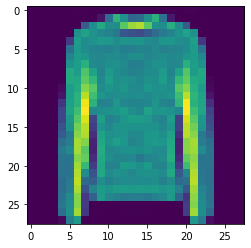

In [25]:
# Vamos mostrar uma imagem aleatória da base cada vez que essa linha de código for executada 
i = random.randint(1,60000)
plt.imshow(treinoArray[i,1:].reshape((28,28)))

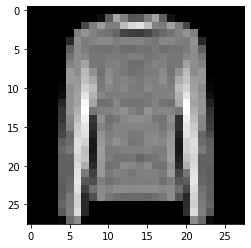

In [26]:
plt.imshow(treinoArray[i,1:].reshape((28,28)),cmap = 'gray')

#### Dividindo a base de treinamento em classe e previsores

In [30]:
#Como o maior valor que um pixel pode assumir é 255, ao efetuar a divisão ja estamos normalizando os valores 0-1
previsoresTreino = treinoArray[:,1:]/255
classeTreino = treinoArray[:,0]

#### Dividindo a base de teste  em classe e previsores

In [31]:
previsoresTeste = testeArray[:,1:]/255
classeTeste = testeArray[:,0]

In [33]:
previsoresTreino.shape

(60000, 784)

####  Quando trabalharmos com redes convolucionais no tensorflow, não é possível trabalhar com o shape normal do nosso array (60000,784).
#### O tensorflow em redes concolucionais trabalha no formato abaixo:
#### ( numeroDeRegistros(batch) , altura , largura , numero de canais )

In [35]:
# Temos 60000 registros 28 por 28 rgb, ou seja com 3 canais de cores
# Anteriormente transfomamos as imagens para apenas um canal, que foi a cor cinza então trabalharemos com 1 canal7
previsoresTreino = previsoresTreino.reshape(previsoresTreino.shape[0],*(28,28,1))
previsoresTeste = previsoresTeste.reshape(previsoresTeste.shape[0],*(28,28,1))

In [37]:
previsoresTreino.shape

(60000, 28, 28, 1)

## 5 - Construção do modelo convolucional 

In [38]:
# Importando os layers e models do keras
from tensorflow.keras import layers,models
# Criando um modelo sequencial 
cnn = models.Sequential()
# Criando a primeira camada de convolução com 32 filtros tamanho 3 por 3, ou seja a rede neural ira ter 32 
# detectores e entre eles vai escolher o que mais tiver acertos para a classificação 
# O tamanho 3x3 é o tanto de pixels da imagem que ele vai ir pegando por vez para diminuir a dimensionalidade
cnn.add(layers.Conv2D(32,(3,3),activation = 'relu',input_shape = (28,28,1)))
cnn.add(layers.MaxPooling2D(2,2))
# Criando mais camadas para melhorar o modelo
cnn.add(layers.Conv2D(64,(3,3),activation = 'relu'))
cnn.add(layers.MaxPooling2D(2,2))
cnn.add(layers.Conv2D(64,(3,3),activation = 'relu'))
# Fazendo a tranformação flatten para que possamos utilizar a nossa rede neural densa classica
cnn.add(layers.Flatten())
# Criando a rede neural densa com 64 neuronios 
cnn.add(layers.Dense(64, activation = 'relu'))
# Criando a camada de saida com 10 saidas já que temos 10 classes no problema, com ativação softmax que 
# retorna uma probabilidade para casa classe, ativação iteal para grande numero de classes 
cnn.add(layers.Dense(10, activation = 'softmax'))
cnn.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

No projeto 7 temos um melhor entendimento dos valores usados para a criação do nosso modelo, por exemplo porque que a nossa primeira camada é de tamanho 26 x 26 se as imagens que entram nela sao 28 x 28

In [39]:
cnn.compile(loss= 'sparse_categorical_crossentropy', optimizer= 'Adam', metrics=['accuracy'])

In [41]:
epochs = 20
history = cnn.fit(previsoresTreino,classeTreino,batch_size=512, epochs= epochs)

Epoch 1/20
118/118 [==============================] - 19s 158ms/step - loss: 0.2494 - accuracy: 0.9096
Epoch 2/20
118/118 [==============================] - 16s 139ms/step - loss: 0.2420 - accuracy: 0.9119
Epoch 3/20
118/118 [==============================] - 19s 157ms/step - loss: 0.2417 - accuracy: 0.9117
Epoch 4/20
118/118 [==============================] - 20s 166ms/step - loss: 0.2320 - accuracy: 0.9162
Epoch 5/20
118/118 [==============================] - 21s 177ms/step - loss: 0.2298 - accuracy: 0.9162
Epoch 6/20
118/118 [==============================] - 22s 186ms/step - loss: 0.2218 - accuracy: 0.9201
Epoch 7/20
118/118 [==============================] - 17s 147ms/step - loss: 0.2187 - accuracy: 0.9198
Epoch 8/20
118/118 [==============================] - 17s 145ms/step - loss: 0.2112 - accuracy: 0.9220
Epoch 9/20
118/118 [==============================] - 17s 145ms/step - loss: 0.2097 - accuracy: 0.9227
Epoch 10/20
118/118 [==============================] - 16s 139ms/step - l

Tivemos uma precisão de 94% ,que poderia ter sido maior com o aumento do numero de épocas de treinamento, porem com um numero muito grande podemos ter um overfitting com accuracy 100% do nosso modelo 

## 6 - Avaliação do modelo 

In [43]:
evaluation = cnn.evaluate(previsoresTeste,classeTeste)
evaluation

313/313 [==============================] - 1s 5ms/step - loss: 0.2746 - accuracy: 0.9082


[0.2746101915836334, 0.9082000255584717]

Acima temos um loss de 0,27 e precisao de 90% do nosso modelo 

#### Verificando visualmente os acertos e erros da rede 

In [44]:
previsoesClasses = cnn.predict_classes(previsoresTeste)
previsoesClasses

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([0, 1, 6, ..., 8, 8, 1])

In [45]:
classeTeste

array([0., 1., 2., ..., 8., 8., 1.], dtype=float32)

Temos acima as previsoes e as respostas, podemos comparar os numeros e ver se de fato são iguais 

#### Matriz de Confusão 

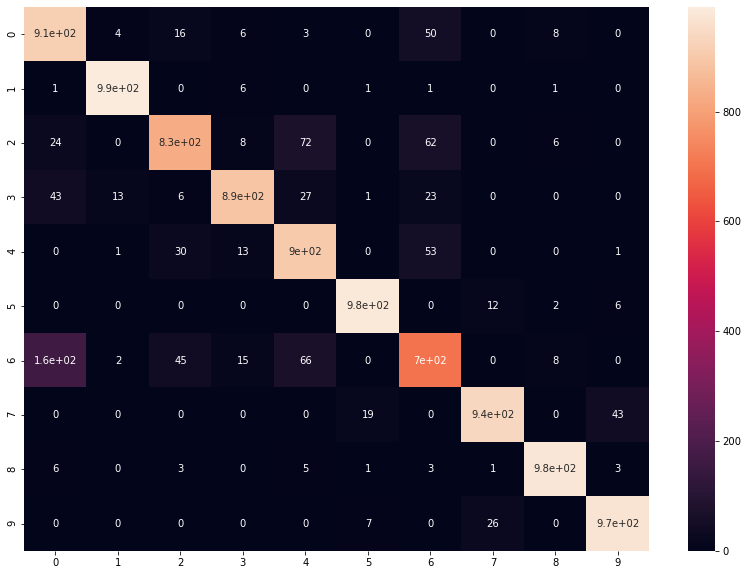

In [48]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(classeTeste,previsoesClasses)
plt.figure(figsize=(14,10))
sb.heatmap(cm,annot = True)